In [1]:
import numpy as np
import pymc as pm
import seaborn as sns
import arviz as az
import scipy.stats as stats
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins").dropna(
    subset=["body_mass_g", "bill_length_mm"]
)

y = penguins[["body_mass_g", "bill_length_mm"]].values

y_z = (y - y.mean(axis=0)) / y.std(axis=0, ddof=1)



In [4]:

rz = stats.pearsonr(y_z[:,0], y_z[:,1])
rhoz = rz.statistic
lo, hi = rz.confidence_interval()
print(*[f'{v:.3f}' for v in [rhoz, lo, hi]] )


0.595 0.522 0.660


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rho,0.591,0.035,0.525,0.656,0.001,0.001,2537.0,2890.0,1.0
sigma[0],1.000,0.039,0.927,1.072,0.001,0.001,2455.0,2504.0,1.0
sigma[1],1.001,0.037,0.933,1.075,0.001,0.001,2404.0,2786.0,1.0


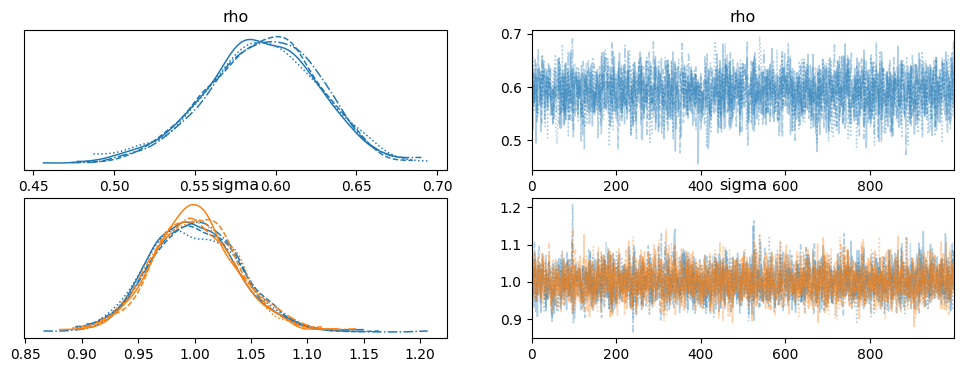

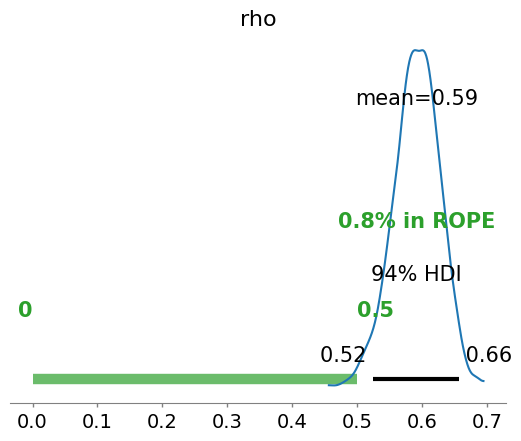

In [13]:
with pm.Model() as model:
    rho = pm.Uniform('rho', -1, 1)
    s1, s2 = pm.HalfNormal('sigma', 1, shape=2)
    cov = pm.math.stack([
        [s1**2, rho*s1*s2],
        [rho*s1*s2, s2**2]
    ])
    lk = pm.MvNormal('lk', mu=[0, 0], cov=cov, observed=y_z)
    idata = pm.sample(nuts_sampler='blackjax', progressbar=0)

az.plot_trace(idata)
az.plot_posterior(idata, rope=[0, 0.5], var_names=['rho'])
az.summary(idata)

In [27]:
p0 = 0.3
k = 7
n = 10
stats.binomtest(k, n, p=p0)

BinomTestResult(k=7, n=10, alternative='two-sided', statistic=0.7, pvalue=0.0105920784)

array([2.82475249e-02, 1.21060821e-01, 2.33474441e-01, 2.66827932e-01,
       2.00120949e-01, 1.02919345e-01, 3.67569090e-02, 9.00169200e-03,
       1.44670050e-03, 1.37781000e-04])

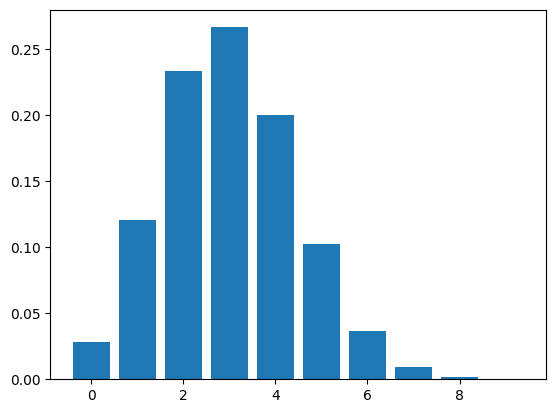

In [23]:
x = np.arange(0, 10)
y = stats.binom.pmf(x, 10, 0.3)
import matplotlib.pyplot as plt
plt.bar(x, y)
y

(Beta(alpha=10.3, beta=5.8), <Axes: >)

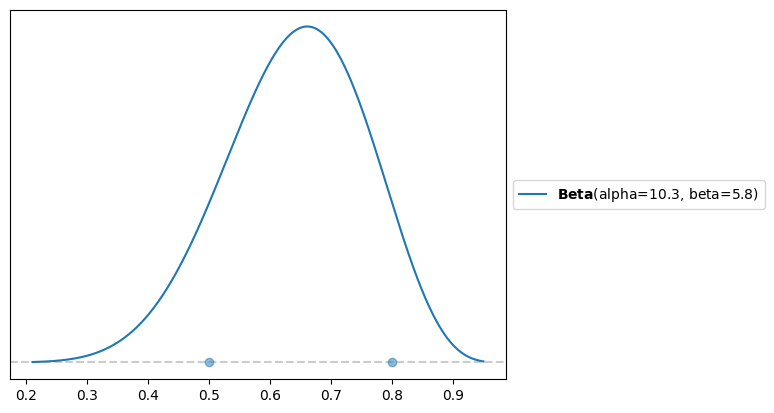

In [38]:
pz.maxent(pz.Beta(), 0.5, 0.8, 0.8)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.683,0.135,0.438,0.924,0.004,0.002,1451.0,1612.0,1.0


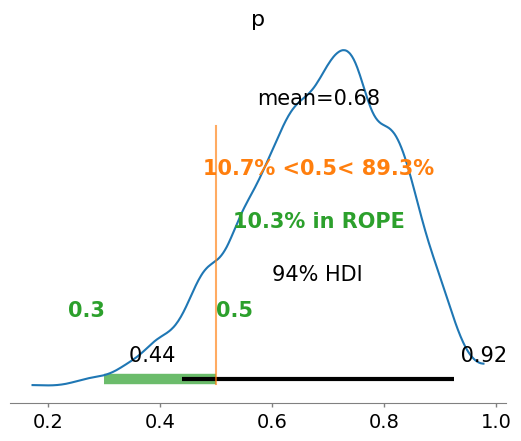

In [14]:
k = 7
n = 10
import pymc as pm
with pm.Model() as model:
    p = pm.Beta('p', 0.5, 0.5)
    lk = pm.Binomial('lk', p=p, observed=k, n=n)
    idata = pm.sample(nuts_sampler='blackjax', progressbar=0)

az.plot_posterior(idata, rope=[0.3, 0.5], ref_val=0.5)
az.summary(idata)